In [2]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
df_merged_gaze=pd.read_csv(r'Fixations\WithRecordingTime\gaze_points_peds_output.csv')
df_merged_gaze =df_merged_gaze.dropna()

In [ ]:
df_merged_gaze.sort_values(by=['participant no', 'way', 'alert','Recording timestamp'], inplace=True)

In [ ]:
df_merged_gaze['fixation_duration'] = df_merged_gaze.groupby(['participant no', 'way', 'alert'])['Recording timestamp'].diff()

# To fill NaN values that appear for the first entry of each group with zero or another placeholder
df_merged_gaze['fixation_duration'].fillna(0, inplace=True)  # Or you can use another appropriate value like np.nan if you prefer
df_merged_gaze

In [ ]:
df_merged_gaze.to_csv(r'Fixations\WithRecordingTime\fixation_duration_ped.csv', index=False)

In [10]:
df_ped=pd.read_csv(r'Fixations\WithRecordingTime\fixation_duration_ped.csv')
average_fixation_durations_ped = df_ped.groupby(['participant no','way', 'alert'])['fixation_duration'].mean()

# Reset index if you want to turn the grouped DataFrame back to a regular DataFrame
average_fixation_durations_ped = average_fixation_durations_ped.reset_index()

# Rename columns for clarity
average_fixation_durations_ped.columns = ['participant no','way', 'Alert Type', 'Average Fixation Duration']
average_fixation_durations_ped

,participant no,way,Alert Type,Average Fixation Duration
0,p1,approach,Baseline,21.861635
1,p1,approach,Bell,20.505882
2,p1,approach,Continuous,21.066465
3,p1,approach,Flash Light,20.809524
4,p1,approach,Voice,21.063444
...,...,...,...,...
75,p7,overtake,Baseline,35.318182
76,p7,overtake,Bell,27.776892
77,p7,overtake,Continuous,25.611722
78,p7,overtake,Flash Light,33.941748


In [11]:

df_cyc=pd.read_csv(r'Fixations\WithRecordingTime\fixation_duration_cyc.csv')
average_fixation_durations_cyc = df_cyc.groupby(['participant no','way', 'alert'])['fixation_duration'].mean()

# Reset index if you want to turn the grouped DataFrame back to a regular DataFrame
average_fixation_durations_cyc = average_fixation_durations_cyc.reset_index()

# Rename columns for clarity
average_fixation_durations_cyc.columns = ['participant no','way', 'Alert Type', 'Average Fixation Duration']
average_fixation_durations_cyc

,participant no,way,Alert Type,Average Fixation Duration
0,c10,approach,Baseline,22.862295
1,c10,approach,Bell,23.876712
2,c10,approach,Continuous,23.595819
3,c10,approach,Flash Light,24.211806
4,c10,approach,Voice,22.636364
...,...,...,...,...
75,c8,overtake,Baseline,23.637288
76,c8,overtake,Bell,28.929461
77,c8,overtake,Continuous,25.082734
78,c8,overtake,Flash Light,22.207006


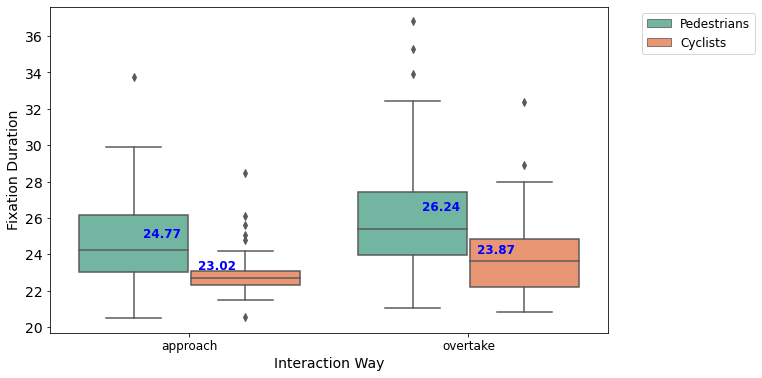

In [14]:
average_fixation_durations_ped['group'] = 'Pedestrians'
average_fixation_durations_cyc['group'] = 'Cyclists'

# Combine both dataframes
df_combined = pd.concat([average_fixation_durations_ped, average_fixation_durations_cyc])

plt.rcParams.update({
    'font.size': 12,      # Set font size for all text
    'font.family': 'sans-serif',  # Change the font family (e.g., 'serif', 'sans-serif', etc.)
    'axes.titlesize': 16,    # Font size for title
    'axes.labelsize': 14,    # Font size for x and y labels
    'xtick.labelsize': 12,   # Font size for x ticks
    'ytick.labelsize': 14,   # Font size for y ticks
    'legend.fontsize': 12    # Font size for the legend
})


# Create the boxplot
plt.figure(figsize=(10, 6))
box_plot = sns.boxplot(x='way', y='Average Fixation Duration', hue='group', data=df_combined, palette="Set2")

# Calculate means for both pedestrian and cyclist fixations and add text
mean_values = df_combined.groupby(['way', 'group'])['Average Fixation Duration'].mean().reset_index()

# Add mean values as text annotations on the plot
for i, row in mean_values.iterrows():
    x_pos = list(df_combined['way'].unique()).index(row['way']) + (0.1 if row['group'] == 'Cyclists' else -0.1)
    plt.text(x_pos, row['Average Fixation Duration'], f'{row["Average Fixation Duration"]:.2f}', color='blue', ha="center", va="bottom", fontweight='bold')

# Set plot title and labels
#plt.title('Number of Fixations: Pedestrians and Cyclists')
plt.xlabel('Interaction Way')
plt.ylabel('Fixation Duration')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()